# BARAH (C0860531), CATHARIN JOSE (C0860087), DANNY JOSE (C0864600), SRI BINDU CHINTAKAYALA (C0857498)









# Book Recommendation System

* Recommender systems are algorithms aimed at suggesting relevant items to users
* We are creating recommendation system based on content based filtering and collaborative filtering 

* Collaborative filtering methods are used to determine a user's level of interest in any product and to make recommendations by filtering products accordingly.

* Content based filtering on the other hand is a method that detects product similarities based on user votes




# File Desription:

The Book-Crossing dataset comprises 3 files.

* Users 

Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL-values.

* Books

Books are identified by their respective ISBN. Some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavours (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon web site.

* Ratings

Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

In [1]:
# Importing libraries

import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import re
from PIL import Image
import requests
import random
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords

In [2]:

import os
for dirname, _, filenames in os.walk('dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

dataset\Books.csv
dataset\Ratings.csv
dataset\Users.csv


In [3]:
#Importing the datasets into pandas dataframe
book = pd.read_csv('dataset/Books.csv',low_memory=False)
rating = pd.read_csv('dataset/Ratings.csv',low_memory=False)
users = pd.read_csv('dataset/Users.csv',low_memory=False)


In [4]:
book.shape

(271360, 8)

In [5]:
book.head(10)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...
6,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...
7,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...
8,0679425608,Under the Black Flag: The Romance and the Real...,David Cordingly,1996,Random House,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...


In [6]:
rating.shape

(1149780, 3)

In [7]:
rating.head(10)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
5,276733,2080674722,0
6,276736,3257224281,8
7,276737,0600570967,6
8,276744,038550120X,7
9,276745,342310538,10


In [8]:
users.shape

(278858, 3)

In [9]:
users.head(10)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
5,6,"santa monica, california, usa",61.0
6,7,"washington, dc, usa",NaN
7,8,"timmins, ontario, canada",NaN
8,9,"germantown, tennessee, usa",NaN
9,10,"albacete, wisconsin, spain",26.0


# Merging the datasets

The variables in the **book dataframe are merged with the rating dataframe**. This will align the  variables (Book-Title, Book-Author, Year-Of-Publication, Publisher,image-URL-S, Image-URL-M, Image-URL-L) present in the book dataframe with the variables (User-ID and Book-rating) in the rating dataframe. The **key** to join these two dataframes are the variables **ISBN**. The new dataset created after merging these two dataframes is named as **df1**.

The new dataframe df1 is then merged with the **Users** dataframe. The variables (Location and Age) are added to the df2 dataframe. The key to join these two dataframes is the User-ID variable. 

In [10]:
df1=book.merge(rating,how="left", on="ISBN")


In [11]:
df1

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2.0,0.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8.0,5.0
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400.0,0.0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676.0,8.0
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1032340,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,276463.0,7.0
1032341,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,276579.0,4.0
1032342,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,276680.0,0.0
1032343,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,276680.0,0.0


In [12]:
df2=df1.merge(users,how="left", on="User-ID")

In [13]:
df2

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2.0,0.0,"stockton, california, usa",18.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8.0,5.0,"timmins, ontario, canada",NaN
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400.0,0.0,"ottawa, ontario, canada",49.0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676.0,8.0,"n/a, n/a, n/a",NaN
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385.0,0.0,"sudbury, ontario, canada",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1032340,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,276463.0,7.0,"providence, rhode island, usa",26.0
1032341,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,276579.0,4.0,"orem, utah, usa",12.0
1032342,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,276680.0,0.0,"hopewell junction, new york, usa",55.0
1032343,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,276680.0,0.0,"hopewell junction, new york, usa",55.0


In [14]:
df=df2.copy()
df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2.0,0.0,"stockton, california, usa",18.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8.0,5.0,"timmins, ontario, canada",NaN
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400.0,0.0,"ottawa, ontario, canada",49.0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676.0,8.0,"n/a, n/a, n/a",NaN
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385.0,0.0,"sudbury, ontario, canada",NaN


# Preparation of the Data Set


In [15]:
#Size of dataset
df.shape

(1032345, 12)

In [16]:
# Dealing with missing observations in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1032345 entries, 0 to 1032344
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ISBN                 1032345 non-null  object 
 1   Book-Title           1032345 non-null  object 
 2   Book-Author          1032344 non-null  object 
 3   Year-Of-Publication  1032345 non-null  object 
 4   Publisher            1032343 non-null  object 
 5   Image-URL-S          1032345 non-null  object 
 6   Image-URL-M          1032345 non-null  object 
 7   Image-URL-L          1032341 non-null  object 
 8   User-ID              1031136 non-null  float64
 9   Book-Rating          1031136 non-null  float64
 10  Location             1031136 non-null  object 
 11  Age                  753301 non-null   float64
dtypes: float64(3), object(9)
memory usage: 102.4+ MB


In [17]:

df.describe()

,User-ID,Book-Rating,Age
count,1.031136e+06,1.031136e+06,753301.000000
mean,1.405945e+05,2.839051e+00,37.397648
std,8.052466e+04,3.854157e+00,14.098254
min,2.000000e+00,0.000000e+00,0.000000
25%,7.041500e+04,0.000000e+00,28.000000
50%,1.412100e+05,0.000000e+00,35.000000
75%,2.114260e+05,7.000000e+00,45.000000
max,2.788540e+05,1.000000e+01,244.000000


In [18]:
# Check missing values percentage
df.isnull().sum()/len(df)*100

ISBN                    0.000000
Book-Title              0.000000
Book-Author             0.000097
Year-Of-Publication     0.000000
Publisher               0.000194
Image-URL-S             0.000000
Image-URL-M             0.000000
Image-URL-L             0.000387
User-ID                 0.117112
Book-Rating             0.117112
Location                0.117112
Age                    27.030111
dtype: float64

In [19]:
print(df.isnull().sum())

ISBN                        0
Book-Title                  0
Book-Author                 1
Year-Of-Publication         0
Publisher                   2
Image-URL-S                 0
Image-URL-M                 0
Image-URL-L                 4
User-ID                  1209
Book-Rating              1209
Location                 1209
Age                    279044
dtype: int64


In [20]:
# Dropping missing values
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)
df.drop(index=df[df["Book-Rating"]==0].index,inplace=True)
df["Book-Title"]=df["Book-Title"].apply(lambda x: re.sub("[\W_]+"," ",x).strip())
df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,67544.0,8.0,"toronto, ontario, canada",30.0
6,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,219008.0,7.0,"halifax, nova scotia, canada",60.0
7,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,263325.0,6.0,"fredericton, new brunswick, canada",27.0
8,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,2954.0,8.0,"wichita, kansas, usa",71.0
9,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,152827.0,7.0,"ottawa, ontario, canada",40.0


In [21]:
#Converting User-ID and Age variable types to int
df['User-ID'] = df['User-ID'].astype('int')
df['Age'] = df['Age'].astype('int')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269617 entries, 2 to 753292
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 269617 non-null  object 
 1   Book-Title           269617 non-null  object 
 2   Book-Author          269617 non-null  object 
 3   Year-Of-Publication  269617 non-null  object 
 4   Publisher            269617 non-null  object 
 5   Image-URL-S          269617 non-null  object 
 6   Image-URL-M          269617 non-null  object 
 7   Image-URL-L          269617 non-null  object 
 8   User-ID              269617 non-null  int32  
 9   Book-Rating          269617 non-null  float64
 10  Location             269617 non-null  object 
 11  Age                  269617 non-null  int32  
dtypes: float64(1), int32(2), object(9)
memory usage: 24.7+ MB


## Data Analysis

In [23]:
df.describe()

,User-ID,Book-Rating,Age
count,269617.000000,269617.000000,269617.000000
mean,138267.768935,7.736152,36.835823
std,78901.127395,1.814537,13.753026
min,19.000000,1.000000,0.000000
25%,72261.000000,7.000000,28.000000
50%,135265.000000,8.000000,35.000000
75%,206768.000000,9.000000,45.000000
max,278852.000000,10.000000,244.000000


In [24]:
import seaborn as sns

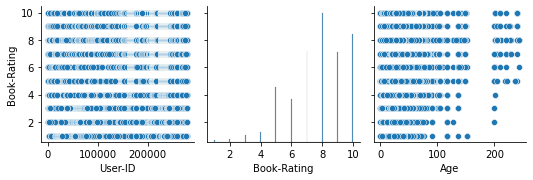

In [25]:
sns.pairplot(df,y_vars="Book-Rating")

In [26]:
#save numeric names
cnames =  [ "Age"]

#Detect and delete outliers from data
for i in cnames:
    #print(i)
    q75, q25 = np.percentile(df.loc[:,i], [75 ,25])
    iqr = q75 - q25

    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    #print(minimum)
    #print(maximum)
    
    df = df.drop(df[df.loc[:,i] < minimum].index)
    df = df.drop(df[df.loc[:,i] > maximum].index)

df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,67544,8.0,"toronto, ontario, canada",30
6,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,219008,7.0,"halifax, nova scotia, canada",60
7,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,263325,6.0,"fredericton, new brunswick, canada",27
9,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,152827,7.0,"ottawa, ontario, canada",40
10,0374157065,Flu The Story of the Great Influenza Pandemic ...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,35704,6.0,"kansas city, missouri, usa",53


<AxesSubplot:ylabel='Age'>

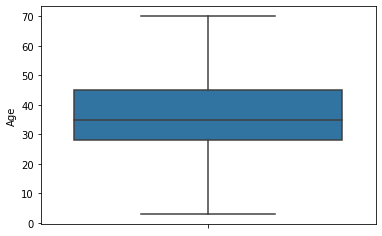

In [27]:
sns.boxplot(y= df['Age'])

In [28]:
df.describe()

,User-ID,Book-Rating,Age
count,266273.000000,266273.000000,266273.000000
mean,138253.772504,7.739042,36.331141
std,78872.632073,1.812964,11.888347
min,19.000000,1.000000,3.000000
25%,72214.000000,7.000000,28.000000
50%,135265.000000,8.000000,35.000000
75%,206570.000000,9.000000,45.000000
max,278852.000000,10.000000,70.000000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266273 entries, 2 to 753292
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 266273 non-null  object 
 1   Book-Title           266273 non-null  object 
 2   Book-Author          266273 non-null  object 
 3   Year-Of-Publication  266273 non-null  object 
 4   Publisher            266273 non-null  object 
 5   Image-URL-S          266273 non-null  object 
 6   Image-URL-M          266273 non-null  object 
 7   Image-URL-L          266273 non-null  object 
 8   User-ID              266273 non-null  int32  
 9   Book-Rating          266273 non-null  float64
 10  Location             266273 non-null  object 
 11  Age                  266273 non-null  int32  
dtypes: float64(1), int32(2), object(9)
memory usage: 24.4+ MB


In [30]:
df.head(10)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,67544,8.0,"toronto, ontario, canada",30
6,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,219008,7.0,"halifax, nova scotia, canada",60
7,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,263325,6.0,"fredericton, new brunswick, canada",27
9,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,152827,7.0,"ottawa, ontario, canada",40
10,0374157065,Flu The Story of the Great Influenza Pandemic ...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,35704,6.0,"kansas city, missouri, usa",53
12,0374157065,Flu The Story of the Great Influenza Pandemic ...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,110912,10.0,"milpitas, california, usa",36
14,0374157065,Flu The Story of the Great Influenza Pandemic ...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,157969,8.0,"denver, colorado, usa",30
15,0374157065,Flu The Story of the Great Influenza Pandemic ...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,192665,8.0,"vacaville, california, usa",47
16,0374157065,Flu The Story of the Great Influenza Pandemic ...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,197659,9.0,"indiana, pennsylvania, usa",49
17,0399135782,The Kitchen God s Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,29526,9.0,"knoxville, tennessee, usa",26


In [31]:
df_rating = df[['Book-Title', 'Book-Author','Publisher','Image-URL-L','Book-Rating']].copy()
df_rating

,Book-Title,Book-Author,Publisher,Image-URL-L,Book-Rating
2,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,8.0
6,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,7.0
7,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,6.0
9,Decision in Normandy,Carlo D'Este,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,7.0
10,Flu The Story of the Great Influenza Pandemic ...,Gina Bari Kolata,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,6.0
...,...,...,...,...,...
753283,Dreamsnake,Vonda N. McIntyre,Houghton Mifflin,http://images.amazon.com/images/P/0395264707.0...,10.0
753288,Cocktail Classics,David Biggs,Connaught,http://images.amazon.com/images/P/1845170423.0...,7.0
753290,Flashpoints Promise and Peril in a New World,Robin Wright,Ballantine Books,http://images.amazon.com/images/P/0449906736.0...,5.0
753291,There s a Bat in Bunk Five,Paula Danziger,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,7.0


# POPULARITY BASED RECOMMENDATION SYSTEM

* Popularity based recommendation systems are based on the rating of items by all the users.
* Popularity based recommendation systems works with the trend. It basically uses the items which are in trend right now.

In [32]:
def popular_books(df_rating,n=100):
    rating_count=df_rating.groupby("Book-Title").count()["Book-Rating"].reset_index()
    rating_count.rename(columns={"Book-Rating":"NumberOfVotes"},inplace=True)
    
    rating_average=df_rating.groupby("Book-Title")["Book-Rating"].mean().reset_index()
    rating_average.rename(columns={"Book-Rating":"AverageRatings"},inplace=True)
    
    popularBooks=rating_count.merge(rating_average,on="Book-Title")
    
    def weighted_rate(x):
        v=x["NumberOfVotes"]
        R=x["AverageRatings"]
        
        return ((v*R) + (m*C)) / (v+m)
    
    C=popularBooks["AverageRatings"].mean()
    m=popularBooks["NumberOfVotes"].quantile(0.90)
    
    popularBooks=popularBooks[popularBooks["NumberOfVotes"] >=250]
    popularBooks["Popularity"]=popularBooks.apply(weighted_rate,axis=1)
    popularBooks=popularBooks.sort_values(by="Popularity",ascending=False)
    return popularBooks[["Book-Title","NumberOfVotes","AverageRatings","Popularity"]].reset_index(drop=True).head(n)

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x0000024D18683AE0>

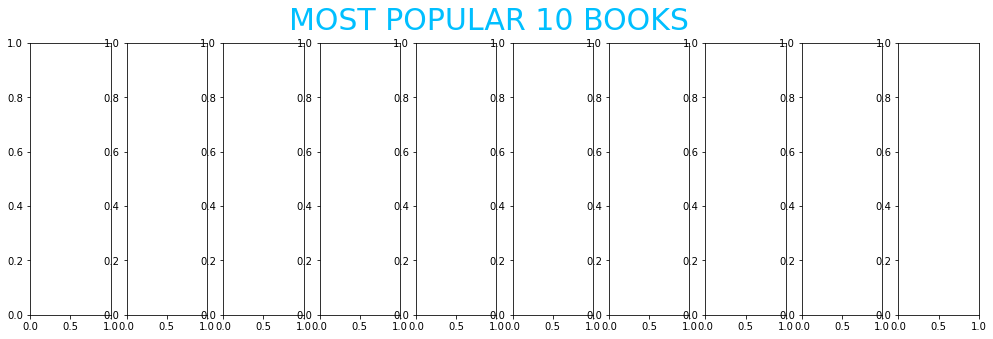

In [68]:
import io
n=10
top_ten=pd.DataFrame(popular_books(df_rating,10))
fig,ax=plt.subplots(1,10,figsize=(17,5))
fig.suptitle("MOST POPULAR 10 BOOKS",fontsize=30,color="deepskyblue")

for i in range(len(top_ten["Book-Title"].tolist())):
    url=df_rating.loc[df_rating["Book-Title"]==top_ten["Book-Title"].tolist()[i],"Image-URL-L"][:1].values[0]
    r =requests.get(url,stream=True)
    img = Image.open(io.BytesIO(r.content))
    ax[i].imshow(img)
    ax[i].axis("off")
    ax[i].set_title("RATING: {} ".format(round(df_rating[df_rating["Book-Title"]==top_ten["Book-Title"].tolist()[i]]["Book-Rating"].mean(),1)),y=-0.20,color="mediumorchid",fontsize=10)
    fig.show()

In [ ]:
http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg


In [64]:
df_test=df_rating[df_rating["Book-Rating"]==10]
df_test

,Book-Title,Book-Author,Publisher,Image-URL-L,Book-Rating
12,Flu The Story of the Great Influenza Pandemic ...,Gina Bari Kolata,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,10.0
20,The Kitchen God s Wife,Amy Tan,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,10.0
30,The Kitchen God s Wife,Amy Tan,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,10.0
58,The Testament,John Grisham,Dell,http://images.amazon.com/images/P/0440234743.0...,10.0
71,The Testament,John Grisham,Dell,http://images.amazon.com/images/P/0440234743.0...,10.0
...,...,...,...,...,...
753244,Dangerous Dolls of Delaware American Chillers,Johnathan Rand,Audio Craft Pr Inc,http://images.amazon.com/images/P/1893699560.0...,10.0
753259,Walking With the Great Apes Jane Goodall Dian ...,Sy Montgomery,Mariner Books,http://images.amazon.com/images/P/0395611563.0...,10.0
753267,Illustrated Encyclopedia of Cacti,Glass Charles,Headline,http://images.amazon.com/images/P/0747204020.0...,10.0
753273,Hokuspokus liebe mich Und fÃ Â¼nfzig andere Za...,Helen Glisic,Dtv,http://images.amazon.com/images/P/3423200944.0...,10.0


In [62]:
url=df_rating.loc[df_rating["Book-Title"]==top_ten["Book-Title"].tolist()[i],"Image-URL-L"][:1].values[0]
r =requests.get(url,stream=True)
img = Image.open(io.BytesIO(r.content))
ax[i].imshow(img)

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x0000024D172D9630>